In [1]:
import ND_north_star.src.noise_generators.perlin_noise_generator as PNG
from ND_north_star.src.utils.sample_function import sample_coords_and_values
# from ND_north_star.src.utils.coord_to_image_transforms import coord_val_to_image, image_to_coord_val
import ND_north_star.src.compute_errors.dataset_error as DE

In [2]:
import numpy as np
import copy

resolution = 80
dimensions = [resolution, resolution]

dataset_1 = PNG.normalized_perlin_data(dimensions, 1)

In [3]:
def inject_error(dataset_1, method:str = 'random'):

    dataset_2 = copy.deepcopy(dataset_1)

    if method == 'random':
        # Random error
        num_points = 500
        swap_values_indices = np.random.choice(len(dataset_2['values_array']), num_points, replace=False)


    elif method == 'center':
        # # Selecting a region of the dataset to apply the error
        slice_amount = 0.1
        x_bound = [0.5 - slice_amount, 0.5 + slice_amount]
        y_bound = [0.5 - slice_amount, 0.5 + slice_amount]

        # Converting coordinate lists to numpy arrays
        x_coord_array = np.array(dataset_2['coordinates_list'][0])
        y_coord_array = np.array(dataset_2['coordinates_list'][1])

        # Finding indices within the bounds
        in_x = (x_bound[0] < x_coord_array) & (x_coord_array < x_bound[1])
        in_y = (y_bound[0] < y_coord_array) & (y_coord_array < y_bound[1])

        # Combining the indices to find points that satisfy both conditions
        swap_values_indices = np.where(in_x & in_y)


    elif method == 'block':
        # # Selecting a region of the dataset to apply the error

        x_bound = [0.1,0.3]
        y_bound = [0.4,0.6]
        # Converting coordinate lists to numpy arrays
        x_coord_array = np.array(dataset_2['coordinates_list'][0])
        y_coord_array = np.array(dataset_2['coordinates_list'][1])

        # Finding indices within the bounds
        in_x = (x_bound[0] < x_coord_array) & (x_coord_array < x_bound[1])
        in_y = (y_bound[0] < y_coord_array) & (y_coord_array < y_bound[1])

        # Combining the indices to find points that satisfy both conditions
        swap_values_indices = np.where(in_x & in_y)

    elif method == 'corners':

        slice_amount = 0.1

        x_bound = [0 + slice_amount, 1 - slice_amount]
        y_bound = [0 + slice_amount, 1 - slice_amount]
        # Converting coordinate lists to numpy arrays
        x_coord_array = np.array(dataset_2['coordinates_list'][0])
        y_coord_array = np.array(dataset_2['coordinates_list'][1])

        # Finding indices within the bounds
        in_x = (x_coord_array < x_bound[0]) | (x_coord_array > x_bound[1])
        in_y = (y_coord_array < y_bound[0]) | (y_coord_array > y_bound[1])

        # Combining the indices to find points that satisfy both conditions
        swap_values_indices = np.where(in_x & in_y)


    selected_values = dataset_2['values_array'][swap_values_indices]
    # Apply the conditional change: if value is 0, change to 1; if value is 1, change to 0
    dataset_2['values_array'][swap_values_indices] = np.where(selected_values == 0, 1, 0)

    return dataset_2


<Figure size 640x480 with 0 Axes>

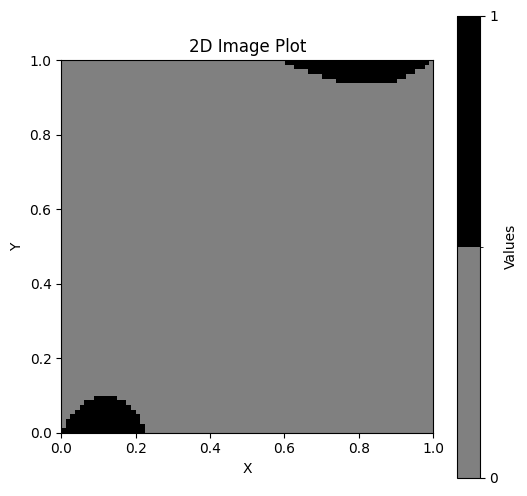

<Figure size 640x480 with 0 Axes>

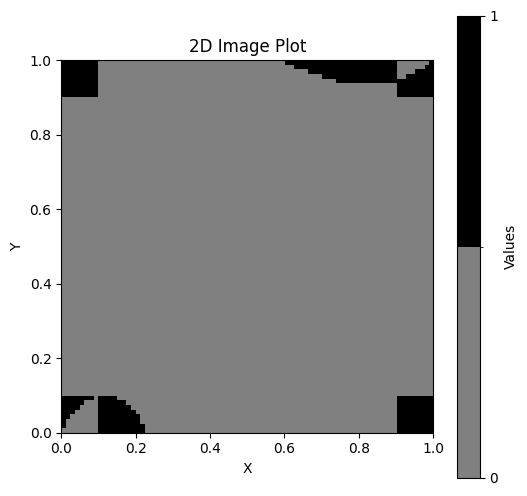

<Figure size 640x480 with 0 Axes>

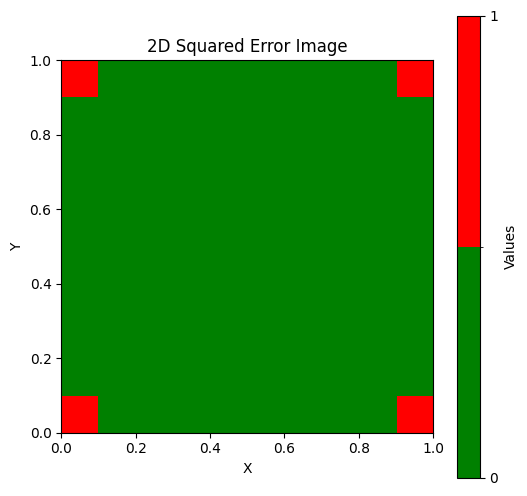

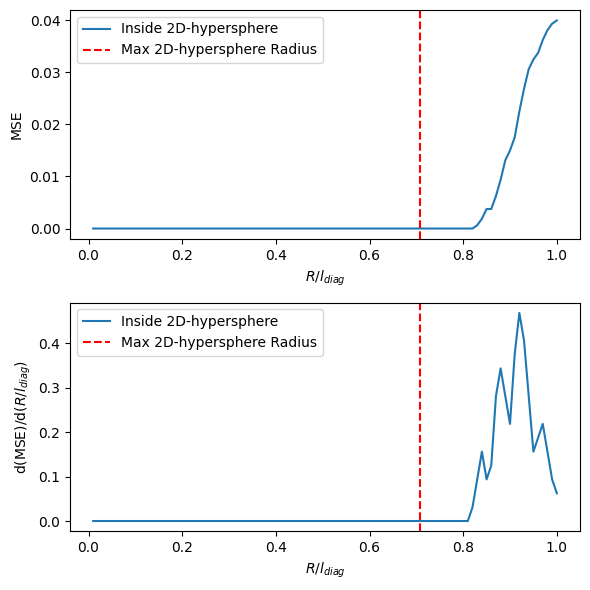

In [4]:
PNG.plot_perlin_2D_3D(dataset_1, 'black')

dataset_2 = inject_error(dataset_1, method='corners')
PNG.plot_perlin_2D_3D(dataset_2, 'black')

SE_dataset = DE.compute_ND_error(dataset_1, dataset_2)
DE.plot_SE_2D(SE_dataset)

DE.plot_SE_ND_in_out_plots(SE_dataset)




<Figure size 640x480 with 0 Axes>

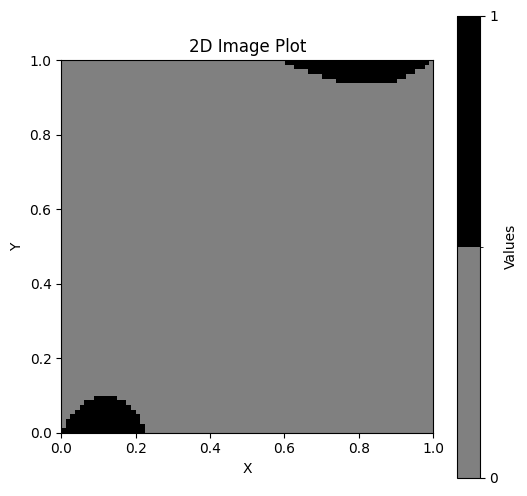

<Figure size 640x480 with 0 Axes>

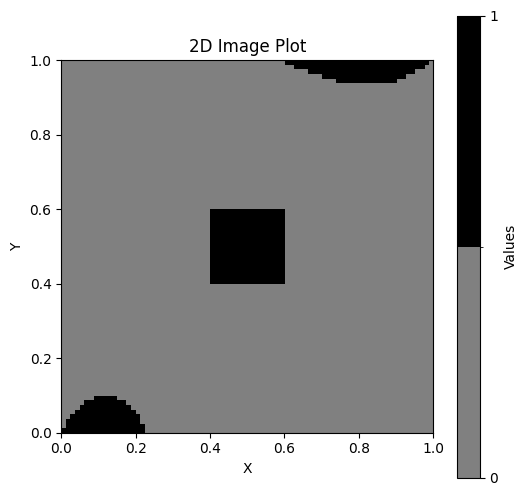

<Figure size 640x480 with 0 Axes>

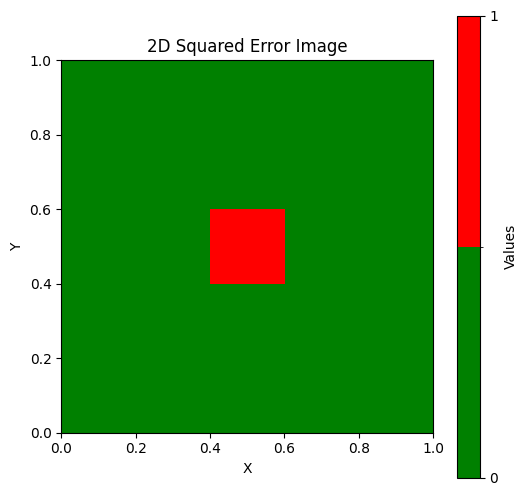

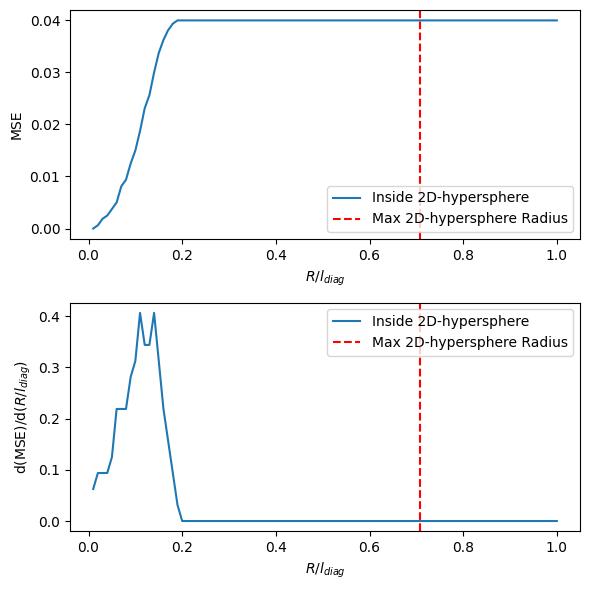

In [5]:
PNG.plot_perlin_2D_3D(dataset_1, 'black')

dataset_2 = inject_error(dataset_1, method='center')
PNG.plot_perlin_2D_3D(dataset_2, 'black')

SE_dataset = DE.compute_ND_error(dataset_1, dataset_2)
DE.plot_SE_2D(SE_dataset)

DE.plot_SE_ND_in_out_plots(SE_dataset)


<Figure size 640x480 with 0 Axes>

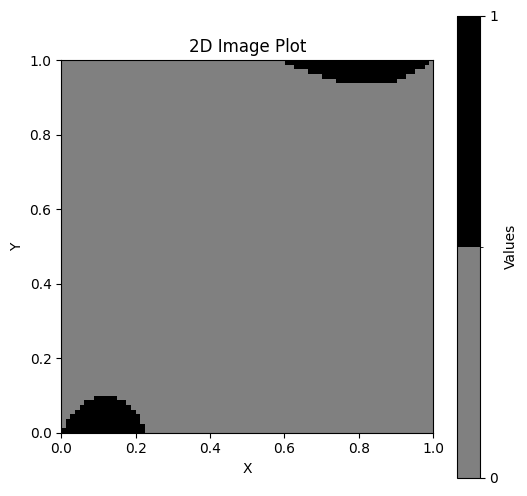

<Figure size 640x480 with 0 Axes>

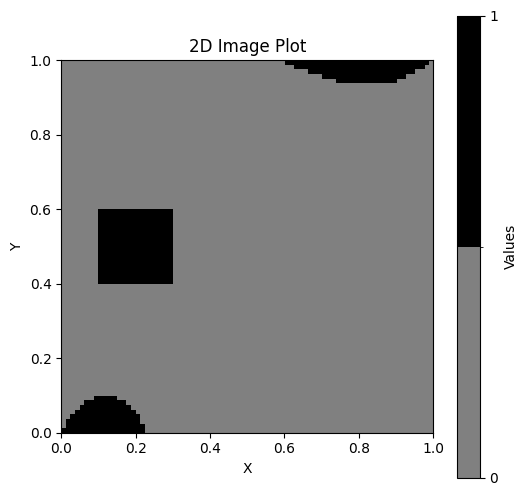

<Figure size 640x480 with 0 Axes>

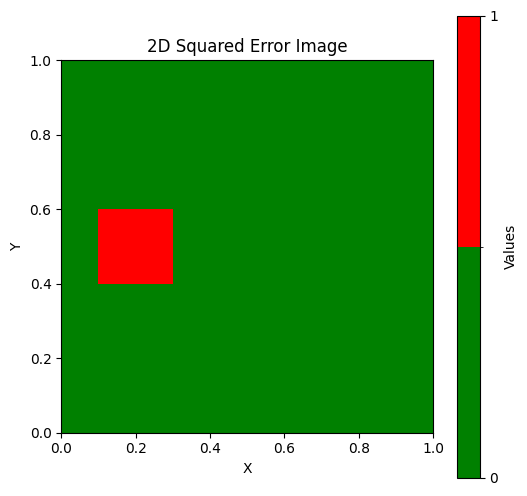

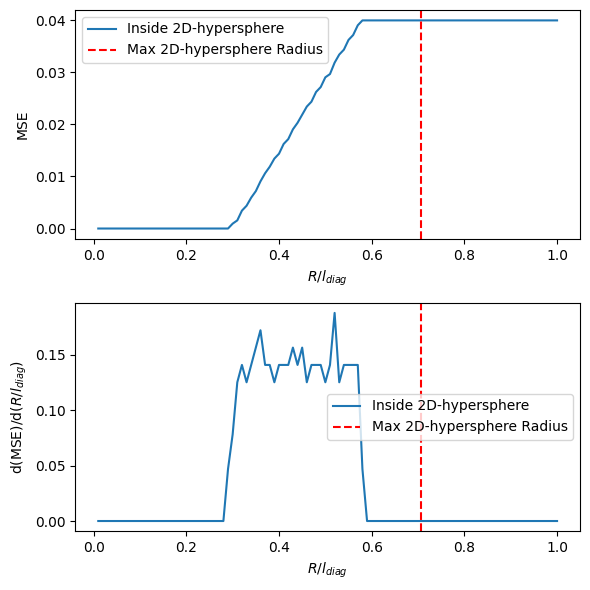

In [6]:
PNG.plot_perlin_2D_3D(dataset_1, 'black')

dataset_2 = inject_error(dataset_1, method='block')
PNG.plot_perlin_2D_3D(dataset_2, 'black')

SE_dataset = DE.compute_ND_error(dataset_1, dataset_2)
DE.plot_SE_2D(SE_dataset)

DE.plot_SE_ND_in_out_plots(SE_dataset)


<Figure size 640x480 with 0 Axes>

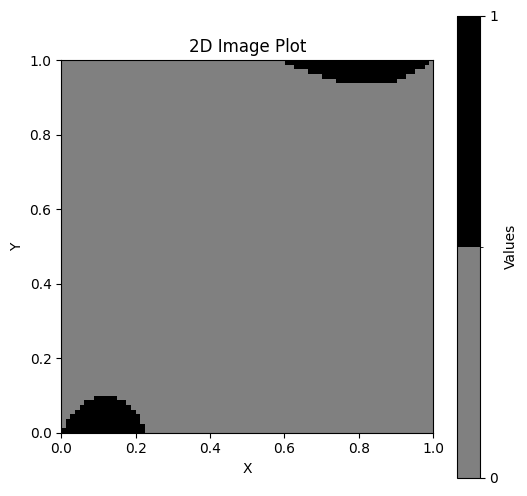

<Figure size 640x480 with 0 Axes>

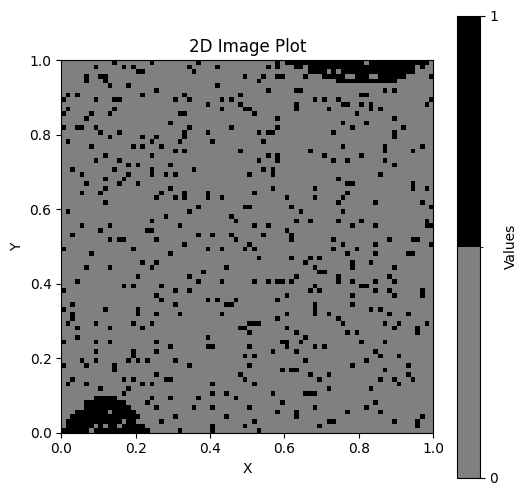

<Figure size 640x480 with 0 Axes>

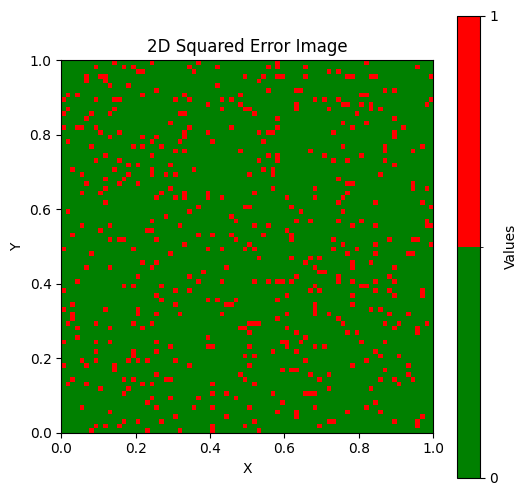

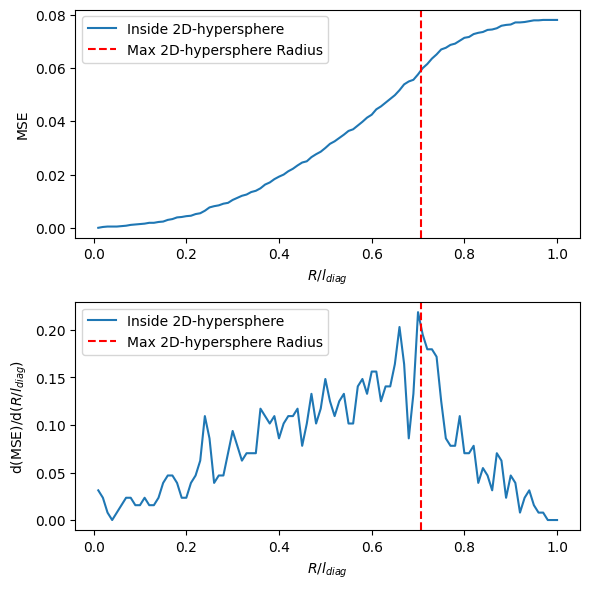

In [7]:
PNG.plot_perlin_2D_3D(dataset_1, 'black')

dataset_2 = inject_error(dataset_1, method='random')
PNG.plot_perlin_2D_3D(dataset_2, 'black')

SE_dataset = DE.compute_ND_error(dataset_1, dataset_2)
DE.plot_SE_2D(SE_dataset)

DE.plot_SE_ND_in_out_plots(SE_dataset)


In [8]:
import numpy as np
import copy

resolution = 30
dimensions = [resolution, resolution, resolution]

dataset_1 = PNG.normalized_perlin_data(dimensions, 1)

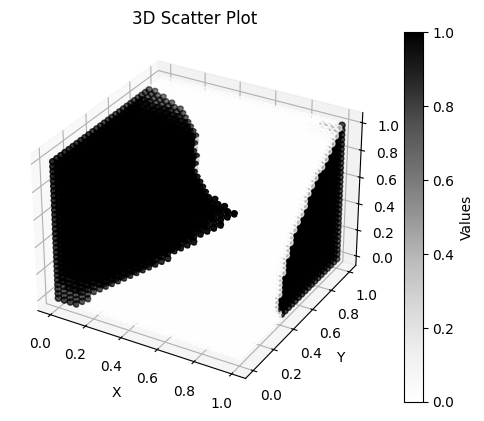

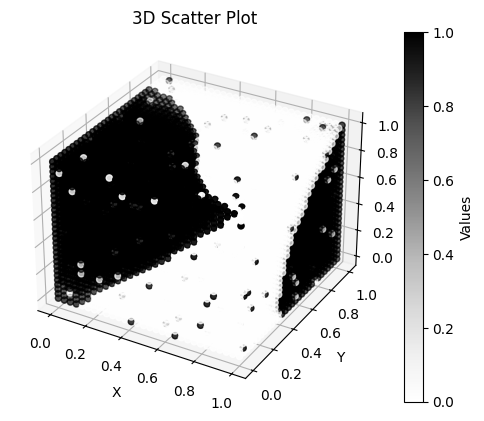

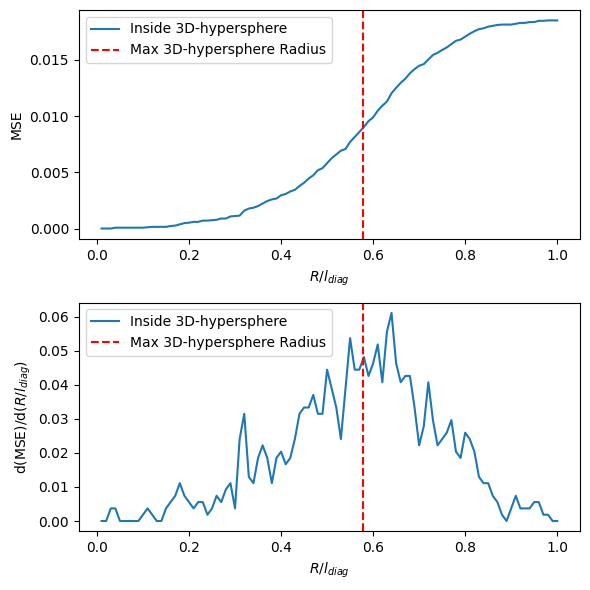

In [9]:
PNG.plot_perlin_2D_3D(dataset_1, 'black')

dataset_2 = inject_error(dataset_1, method='random')
PNG.plot_perlin_2D_3D(dataset_2, 'black')

SE_dataset = DE.compute_ND_error(dataset_1, dataset_2)
DE.plot_SE_2D(SE_dataset)

DE.plot_SE_ND_in_out_plots(SE_dataset)


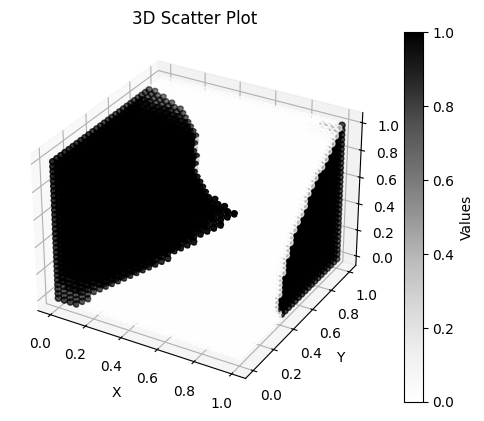

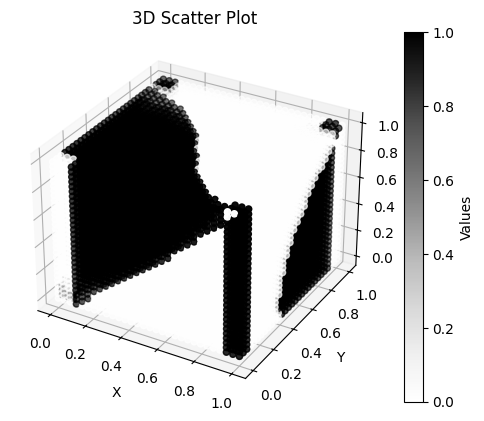

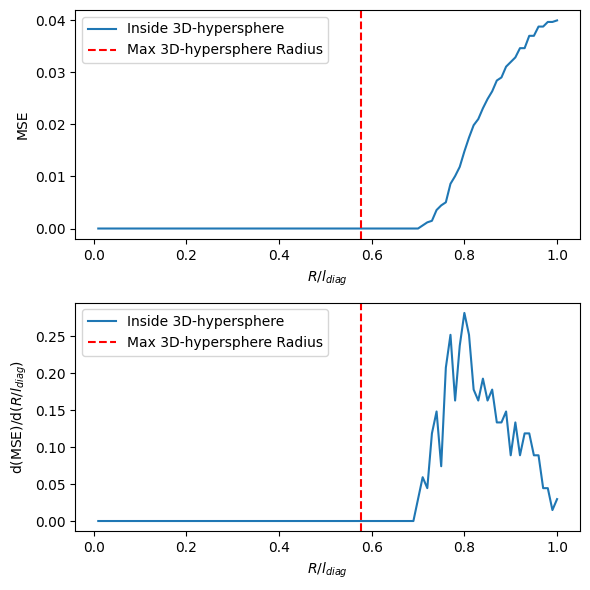

In [10]:
PNG.plot_perlin_2D_3D(dataset_1, 'black')

dataset_2 = inject_error(dataset_1, method='corners')
PNG.plot_perlin_2D_3D(dataset_2, 'black')

SE_dataset = DE.compute_ND_error(dataset_1, dataset_2)
DE.plot_SE_2D(SE_dataset)

DE.plot_SE_ND_in_out_plots(SE_dataset)
